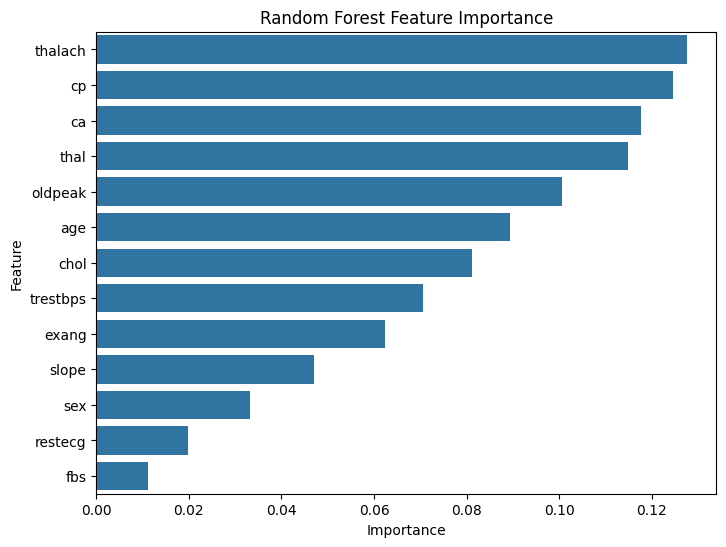

📊 Feature Importance Ranking:
     Feature  Importance
7    thalach    0.127532
2         cp    0.124639
11        ca    0.117752
12      thal    0.114876
9    oldpeak    0.100619
0        age    0.089359
4       chol    0.081193
3   trestbps    0.070480
8      exang    0.062352
10     slope    0.047018
1        sex    0.033215
6    restecg    0.019810
5        fbs    0.011155


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


✅ أفضل Features من RFE: ['sex', 'cp', 'exang', 'slope', 'ca']


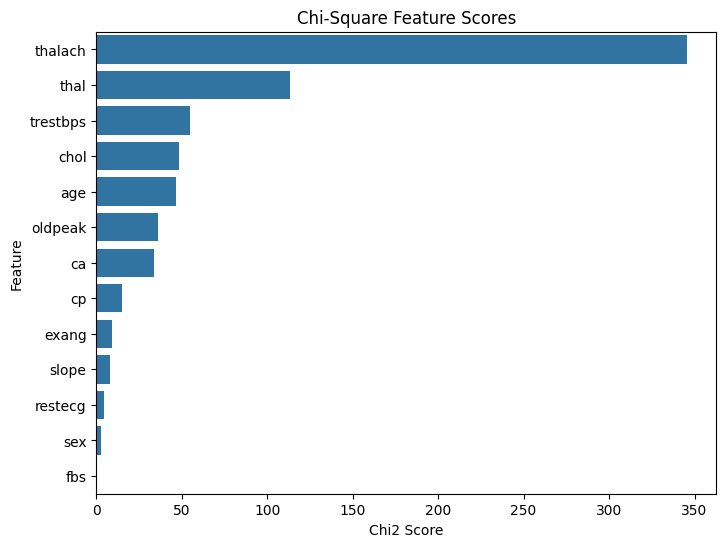


📊 Chi-Square Top Features:
     Feature  Chi2 Score
7    thalach  345.458775
12      thal  113.582049
3   trestbps   55.001299
4       chol   48.252700
0        age   46.456804
9    oldpeak   35.971445
11        ca   33.545935
2         cp   15.140160
8      exang    9.371166
10     slope    8.243914
6    restecg    4.300944
1        sex    3.008185
5        fbs    0.021293

🔑 أفضل Features مشتركة بين الطرق الثلاث:
set()


In [1]:
# ===== Step 2: Feature Selection =====
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.linear_model import LogisticRegression

# تحميل الداتا النظيفة
df = pd.read_csv("/content/heart_disease_clean.csv")

X = df.drop('target', axis=1)
y = df['target']

# --- 1️⃣ Feature Importance باستخدام Random Forest ---
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Random Forest Feature Importance")
plt.show()

print("📊 Feature Importance Ranking:")
print(feature_importances)


# --- 2️⃣ RFE (Recursive Feature Elimination) مع Logistic Regression ---
lr = LogisticRegression(max_iter=500)
rfe = RFE(lr, n_features_to_select=5)  # اختار أفضل 5 Features مثلاً
rfe.fit(X, y)

selected_features_rfe = X.columns[rfe.support_]
print("\n✅ أفضل Features من RFE:", list(selected_features_rfe))


# --- 3️⃣ Chi-Square Test ---
# لازم البيانات تكون موجبة
X_chi = X.copy()
X_chi = X_chi.apply(lambda col: col - col.min() + 1)

chi_selector = SelectKBest(score_func=chi2, k=5)
chi_selector.fit(X_chi, y)

chi_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi_selector.scores_
}).sort_values(by='Chi2 Score', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Chi2 Score', y='Feature', data=chi_scores)
plt.title("Chi-Square Feature Scores")
plt.show()

print("\n📊 Chi-Square Top Features:")
print(chi_scores)


# --- تقاطع النتائج ---
final_selected_features = set(selected_features_rfe) & \
                          set(chi_scores['Feature'].head(5)) & \
                          set(feature_importances['Feature'].head(5))

print("\n🔑 أفضل Features مشتركة بين الطرق الثلاث:")
print(final_selected_features)
